         Server ID     CPU Usage  Memory Usage    Disk Usage  Network Traffic  \
count  10000.00000  10000.000000  10000.000000  10000.000000     1.000000e+04   
mean    5000.50000     49.415956     50.452988     50.005039     4.992147e+08   
std     2886.89568     28.763013     28.929455     28.677376     2.887056e+08   
min        1.00000      0.001163      0.015774      0.004812     1.005531e+06   
25%     2500.75000     24.632887     25.394580     25.374791     2.476104e+08   
50%     5000.50000     49.252862     50.589678     50.206809     5.005302e+08   
75%     7500.25000     74.000635     75.647922     74.467385     7.473691e+08   
max    10000.00000     99.971767     99.992483     99.990098     9.997896e+08   

        Temperature        Uptime      Failures  Maintenance Needed  
count  10000.000000  10000.000000  10000.000000         10000.00000  
mean      59.749104   4408.043456      1.004000             0.10250  
std       23.142734   2525.581346      0.996235             

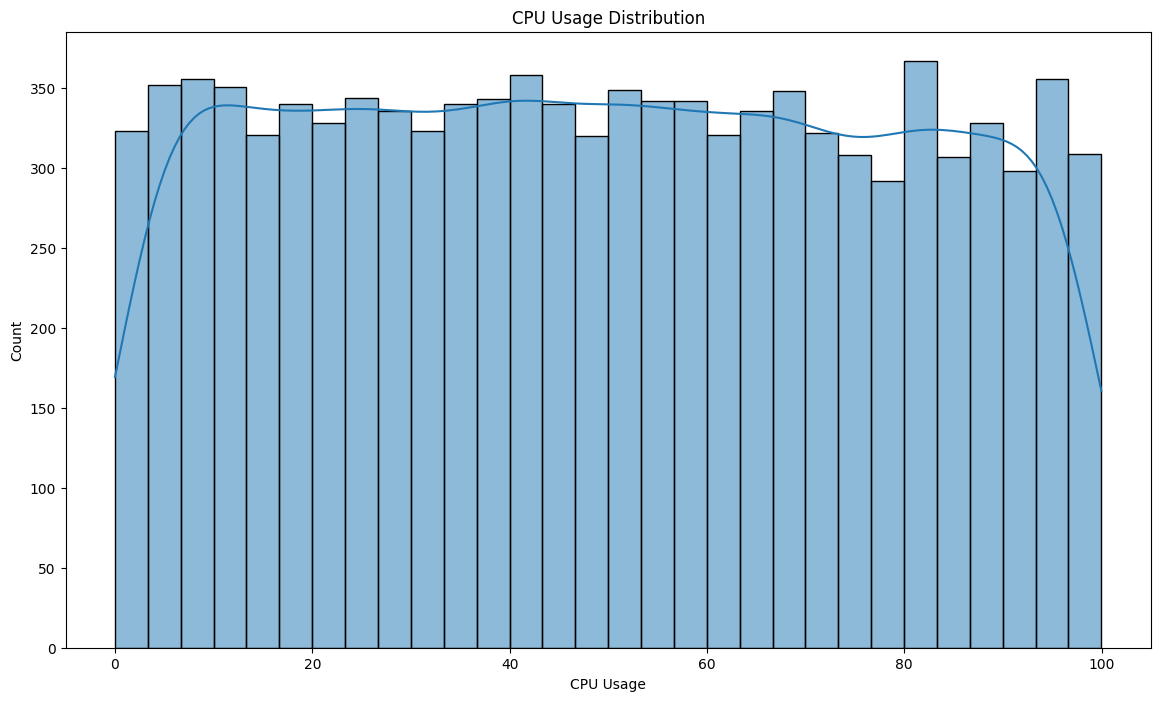

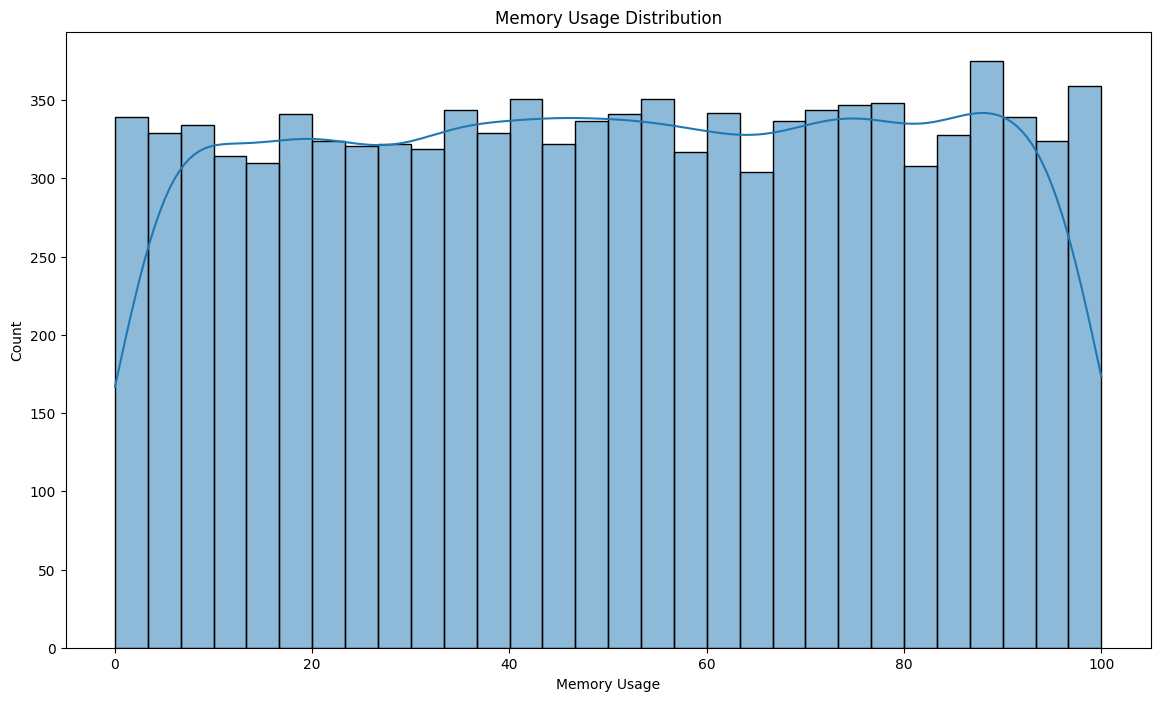

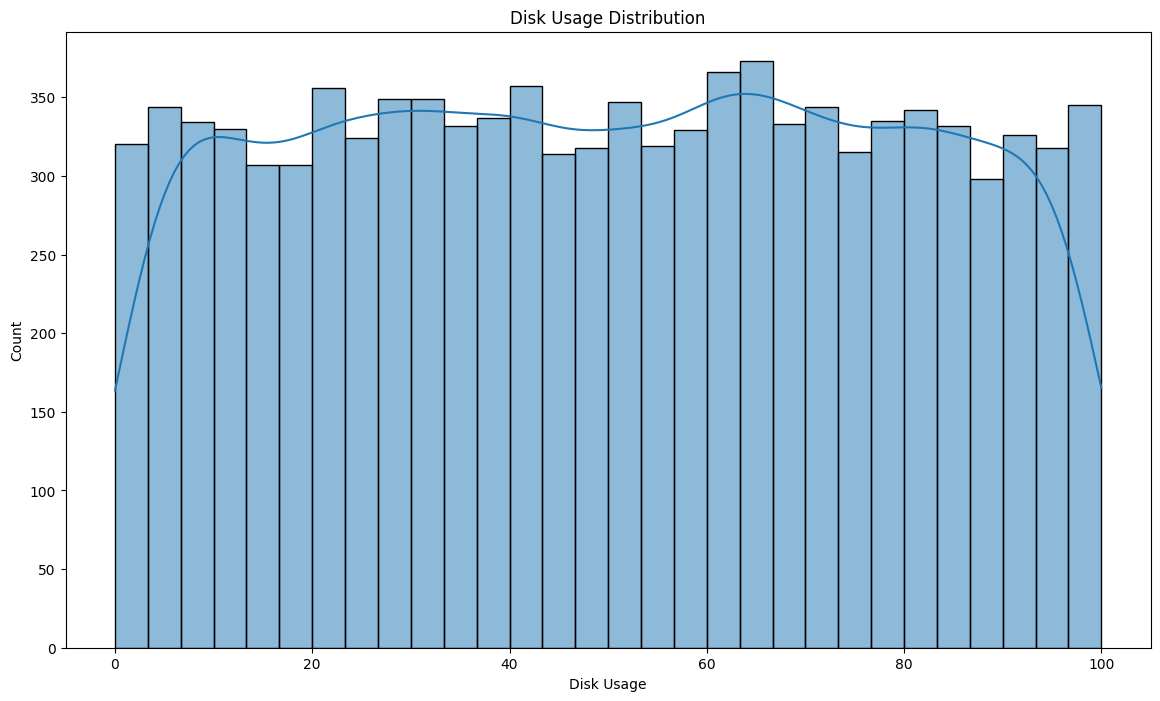

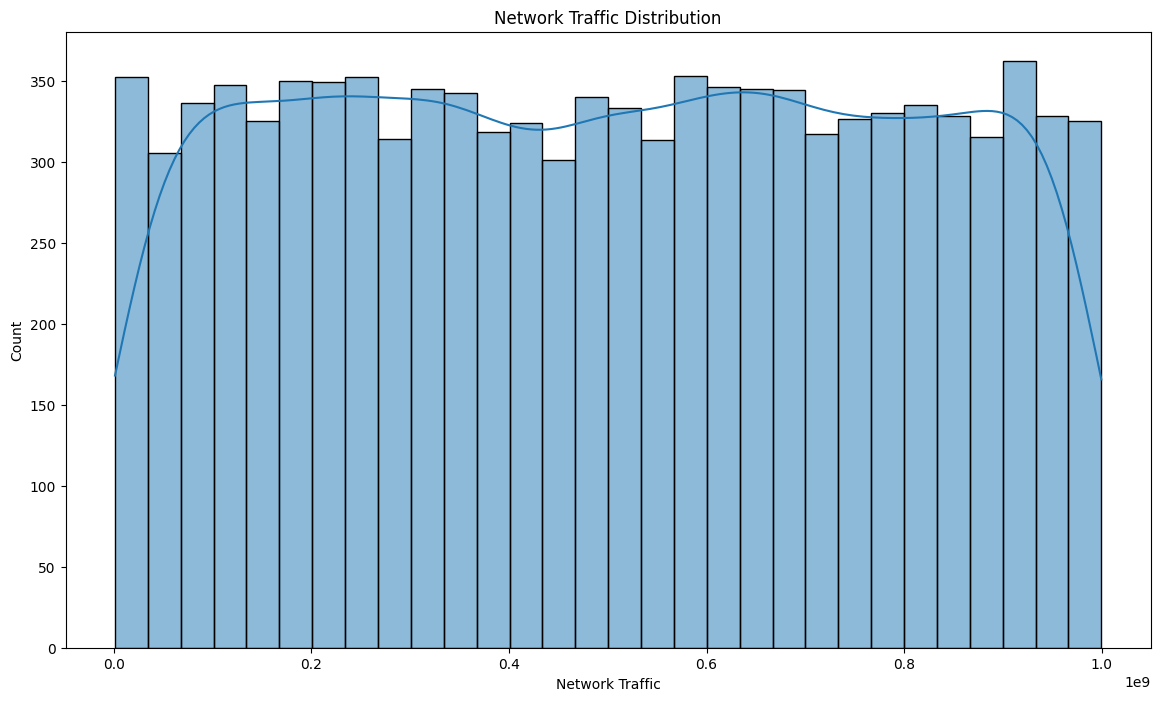

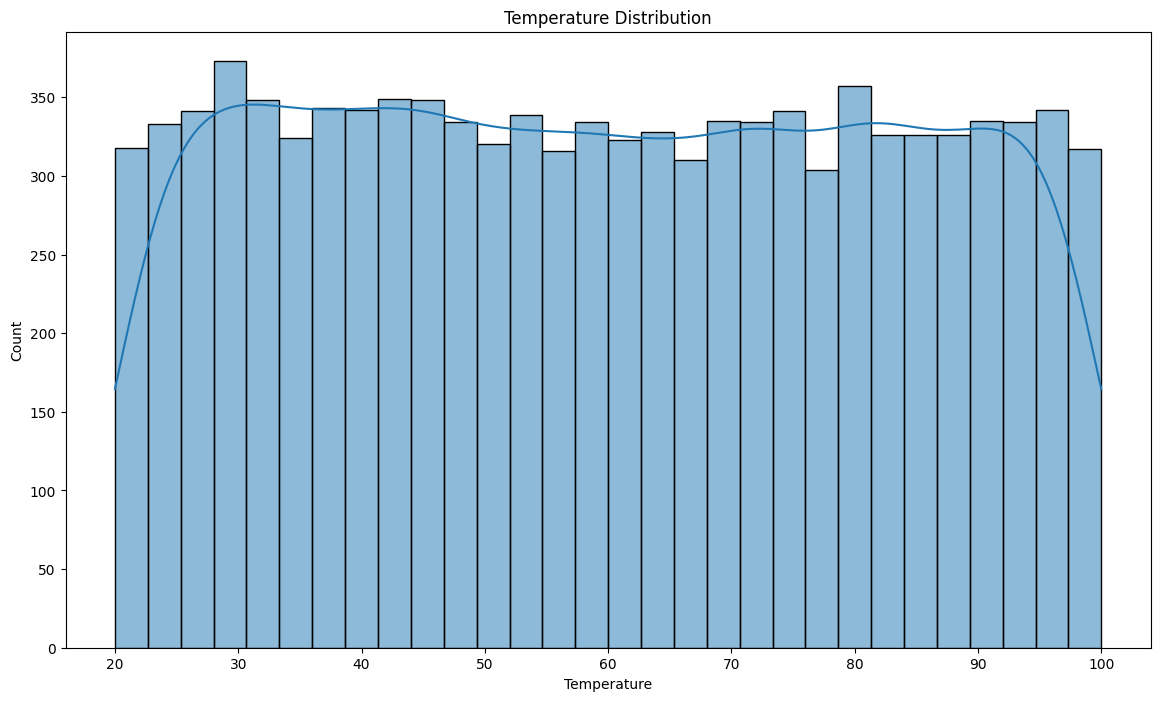

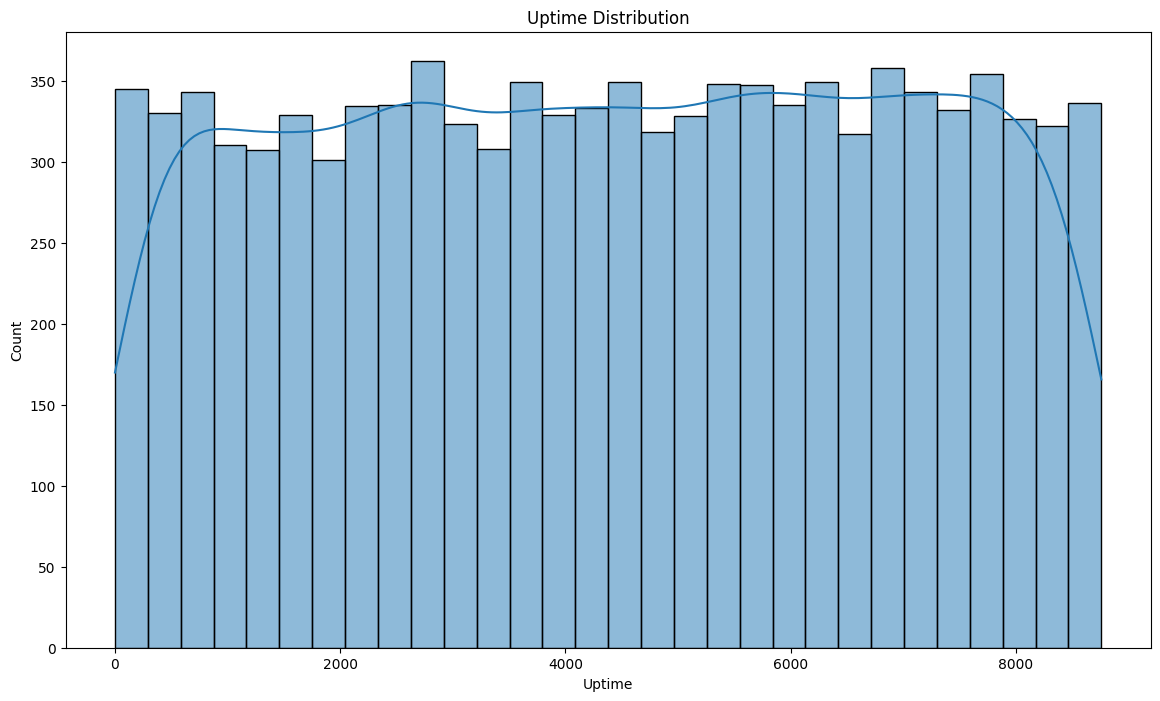

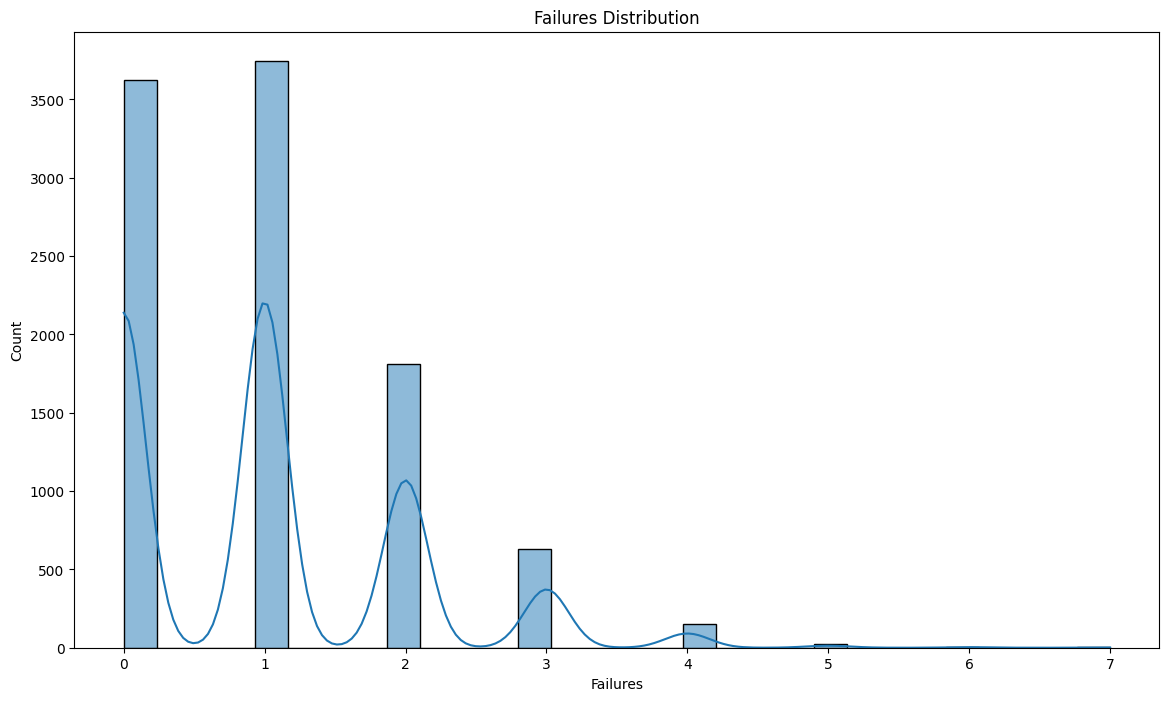

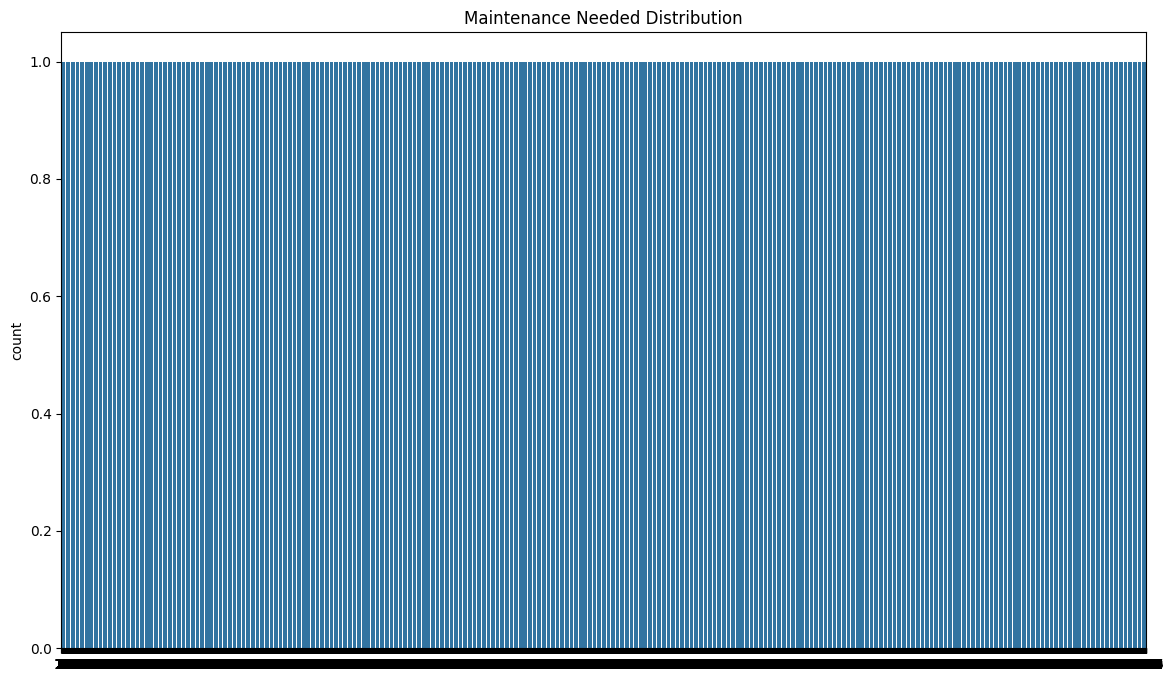

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('synthetic_predictive_maintenance_data.csv')

# Display basic statistics
print(data.describe())

# Display the first few rows of the dataset
print(data.head())

# Plot the distribution of numerical features
plt.figure(figsize=(14, 8))
sns.histplot(data['CPU Usage'], kde=True, bins=30)
plt.title('CPU Usage Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Memory Usage'], kde=True, bins=30)
plt.title('Memory Usage Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Disk Usage'], kde=True, bins=30)
plt.title('Disk Usage Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Network Traffic'], kde=True, bins=30)
plt.title('Network Traffic Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Temperature'], kde=True, bins=30)
plt.title('Temperature Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Uptime'], kde=True, bins=30)
plt.title('Uptime Distribution')
plt.show()

plt.figure(figsize=(14, 8))
sns.histplot(data['Failures'], kde=True, bins=30)
plt.title('Failures Distribution')
plt.show()

# Plot the count of Maintenance Needed
plt.figure(figsize=(14, 8))
sns.countplot(data['Maintenance Needed'])
plt.title('Maintenance Needed Distribution')
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Define features and target
features = ['CPU Usage', 'Memory Usage', 'Disk Usage', 'Network Traffic', 'Temperature', 'Uptime', 'Failures']
target = 'Maintenance Needed'

X = data[features]
y = data[target]

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the MLP model
mlp_model = Sequential()
mlp_model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
mlp_model.add(Dense(32, activation='relu'))
mlp_model.add(Dense(1, activation='sigmoid'))

mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
mlp_history = mlp_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test)
print(f'MLP Model Accuracy: {mlp_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.3634 - accuracy: 0.8780 - val_loss: 0.3621 - val_accuracy: 0.8890
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3301 - accuracy: 0.8996 - val_loss: 0.3572 - val_accuracy: 0.8890
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3287 - accuracy: 0.8996 - val_loss: 0.3565 - val_accuracy: 0.8890
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3269 - accuracy: 0.8996 - val_loss: 0.3537 - val_accuracy: 0.8890
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3265 - accuracy: 0.8996 - val_loss: 0.3543 - val_accuracy: 0.8890
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3249 - accuracy: 0.8996 - val_loss: 0.3549 - val_accuracy: 0.8890
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8996 - val_loss: 0.3527 - val_accuracy: 0.8890
Epoch 

In [5]:
from tensorflow.keras.layers import Conv1D, Flatten

# Reshape data for CNN
X_train_cnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_cnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
cnn_history = cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test)
print(f'CNN Model Accuracy: {cnn_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 2s 4ms/step - loss: 0.3473 - accuracy: 0.8944 - val_loss: 0.3568 - val_accuracy: 0.8890
Epoch 2/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3297 - accuracy: 0.8996 - val_loss: 0.3551 - val_accuracy: 0.8890
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8996 - val_loss: 0.3552 - val_accuracy: 0.8890
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.3275 - accuracy: 0.8996 - val_loss: 0.3549 - val_accuracy: 0.8890
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3261 - accuracy: 0.8996 - val_loss: 0.3591 - val_accuracy: 0.8890
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8996 - val_loss: 0.3516 - val_accuracy: 0.8890
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8996 - val_loss: 0.3544 - val_accuracy: 0.8890
Epoch 

In [6]:
from tensorflow.keras.layers import LSTM

# Reshape data for RNN
X_train_rnn = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build the RNN model
rnn_model = Sequential()
rnn_model.add(LSTM(32, activation='relu', input_shape=(X_train.shape[1], 1)))
rnn_model.add(Dense(64, activation='relu'))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
rnn_history = rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

# Evaluate the model
rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test)
print(f'RNN Model Accuracy: {rnn_accuracy:.4f}')


Epoch 1/10
250/250 [==============================] - 3s 5ms/step - loss: 0.3598 - accuracy: 0.8978 - val_loss: 0.3535 - val_accuracy: 0.8890
Epoch 2/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8996 - val_loss: 0.3502 - val_accuracy: 0.8890
Epoch 3/10
250/250 [==============================] - 2s 6ms/step - loss: 0.3277 - accuracy: 0.8996 - val_loss: 0.3510 - val_accuracy: 0.8890
Epoch 4/10
250/250 [==============================] - 2s 7ms/step - loss: 0.3279 - accuracy: 0.8996 - val_loss: 0.3509 - val_accuracy: 0.8890
Epoch 5/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3271 - accuracy: 0.8996 - val_loss: 0.3490 - val_accuracy: 0.8890
Epoch 6/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8996 - val_loss: 0.3533 - val_accuracy: 0.8890
Epoch 7/10
250/250 [==============================] - 1s 4ms/step - loss: 0.3267 - accuracy: 0.8996 - val_loss: 0.3511 - val_accuracy: 0.8890
Epoch 